In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

In [2]:
import imutils
from imutils import contours
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local

In [3]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [4]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

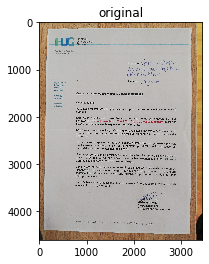

In [5]:
#orig = cv2.imread("receipt05.jpg")
orig = cv2.imread("IMG_20200908_181359.jpg")
displayColorImage(orig, "original")

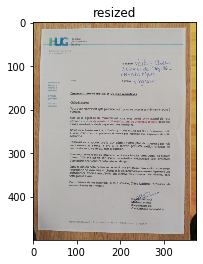

In [6]:
image = orig.copy()
ratio = image.shape[0]/500.0
image = imutils.resize(image, height=500)
displayColorImage(image,"resized")

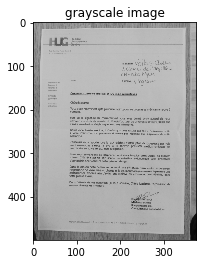

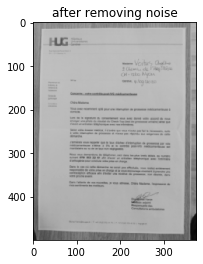

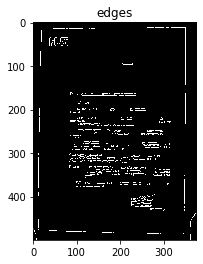

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray,"grayscale image")
gray = cv2.GaussianBlur(gray, (5,5),0)
displayGrayScaleImage(gray,"after removing noise")
edged = cv2.Canny(gray, 75, 200)
displayGrayScaleImage(edged,"edges")

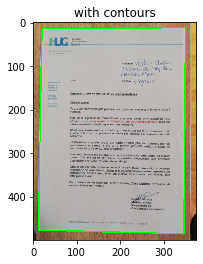

[[[348  12]]

 [[ 20  15]]

 [[ 12 477]]

 [[345 485]]]
[[348  12]
 [ 20  15]
 [ 12 477]
 [345 485]]


In [8]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:4]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    if len(approx) == 4 :
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0,255,0),2)
displayColorImage(image, "with contours")
print(screenCnt)
print(screenCnt.reshape(4,2))

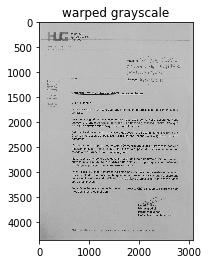

In [9]:
warped = four_point_transform(orig, screenCnt.reshape(4,2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(warped, "warped grayscale")

In [10]:
cv2.imwrite('DR.png', warped)

True

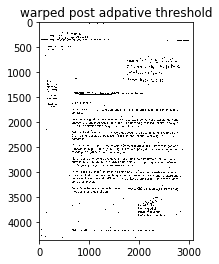

In [11]:
warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, 7)
displayGrayScaleImage(warped, "warped post adpative threshold")

In [12]:
##img = cv2.cvtColor(warped,cv2.COLOR_BGR2RGB)

In [13]:
##cv2.imshow('Result',img)

In [14]:
print(pytesseract.image_to_string(warped))

a A AT A: Ee << <__ EL EGE EE AE NE:

 

}--Genave

EES TO SEES tp Fs ES, + le A SE A A AR I ISO SEE ES

Hapitaux | | | os

' Universitaires

Rue Gabrielle-Perret-Gentil 4

- CH~ 1211 Genéve 14 -

. Département de
la femme, de
l'enfant et de
ladolescent.

Service de
_ gynécologie

Consultations
ambulatoires

Madame Vo} Lis ; Clugélive
2 Chomivx ole | Arg illiere
CH - \2bo Nyouw

Genave, } / og [2020

MY/cp

Concerne : votre contréle post-IVG médicamenteuse |

Chere Madame, So a ,

Vous avez recemment opte pour une interruption de grossesse medicamenteuse a

domicile.

Lors de la signature du consentement vous avez doniné. votre accord de nous

envoyer une photo du résultat du Check-Top (test de grossesse urinaire) ainsi que |

d’avoir un entretien telephonique avec nos infirmiéres.

~ Selon votre dossier médical, il s’'avére . que vous n’avez pas ‘fait le nécessaire, ‘Suite

a votre interruption de. grossesse ‘et navez ‘Pas ‘repondu aux exigences de cette
demarche.

J’aimerais vous rap

In [17]:
rst = pytesseract.image_to_string(warped)
f = open("result.txt", "w")
f.write(rst)
f.close()